### Exploratory Data Analysis
#### Goals:
- Understand underlying structure of data
- Find some relations between variables
- Check for standard deviation, categorical variables, and confidence intervals

In [13]:
import pandas as pd

# Read the CSV file using pandas
movie_data = pd.read_csv("../data/ml-32m/movies.csv",)
ratings_data = pd.read_csv("../data/ml-32m/ratings.csv",)
links_data = pd.read_csv("../data/ml-32m/links.csv",)
tags_data = pd.read_csv("../data/ml-32m/tags.csv",)

In [14]:
# Display the first few rows of the data
print(movie_data.head())
print(ratings_data.head())
print(links_data.head())
print(tags_data.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
   userId

In [22]:
print(movie_data.shape,
        movie_data.head(),
        movie_data.tail())

(87585, 3)    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy          movieId                       title                        genres
87580   292731   The Monroy Affaire (2022)                         Drama
87581   292737  Shelter in Solitude (2023)                  Comedy|Drama
87582   292753                 Orca (2023)                         Drama
87583   292755      The Angry Breed (1968)                         Drama
87584   292757   Race to the 

In [24]:
movie_data.info()
movie_data.isnull().sum() # No missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


movieId    0
title      0
genres     0
dtype: int64

In [27]:
ratings_data.info()
ratings_data.isnull().sum() # No missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ratings_data['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

## Distribution of ratings 
Standard deviation of: ~1.06
Mean Rating: ~3.54
\\ For the purpose of recommendation a "normal" rating is between 1.348 and 5 (5.732). **Very few movies get a rating of 1**

\\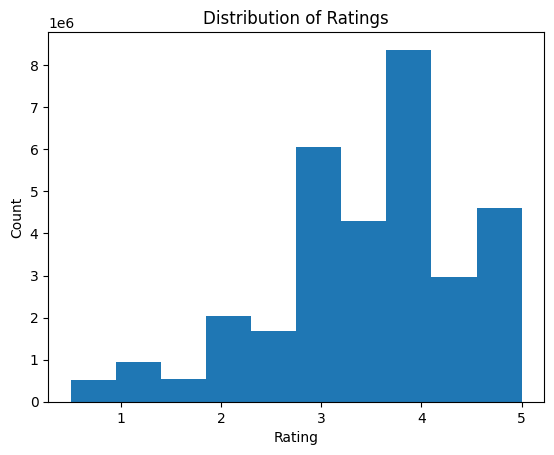


In [35]:
ratings_std = ratings_data['rating'].std()
ratings_mean = ratings_data['rating'].mean()
print(ratings_std, ratings_mean)

1.05898621394531 3.5403956487277393
